<a href="https://colab.research.google.com/github/gitaukamau/Machine_learning/blob/main/Credit_scoring_week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import random

# Data Explotation libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt #Visualization
import seaborn as sns #Advanced Visualization
%matplotlib inline

# Data modelling libraries
from sklearn.impute import SimpleImputer
from collections import Counter
from sklearn.pipeline import make_pipeline
from imblearn.over_sampling import SMOTE
import itertools

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

# Machine Learning Models
from sklearn.svm import LinearSVC, SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier

# Machine Learning Model Evaluation Methods
from sklearn.metrics import accuracy_score, f1_score,confusion_matrix,classification_report,roc_auc_score

In [ ]:
#Loading data
Loan = pd.read_csv("//content//drive//MyDrive//raw-data.csv")
Loan.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32
0,1,0,0,24.0,0.0,2432.0,46500.0,24.0,1385.0,SC,...,NaN,NaN,46500.0,NaN,NaN,0,0,0,TIER 1,0
1,2,0,1,24.0,1.0,1495.0,28168.0,24.0,2496.0,MO,...,NaN,NaN,28168.0,NaN,NaN,0,0,0,TIER 1,0
2,3,0,0,26.0,0.0,1707.0,38900.0,30.0,1346.0,SC,...,NaN,105000.0,38900.0,34.0,31.0,31,31,16,TIER 1,0
3,4,0,0,24.0,0.0,2128.0,42900.0,24.0,1375.0,SC,...,NaN,NaN,42900.0,NaN,NaN,0,0,0,TIER 1,0
4,5,0,0,27.0,0.0,1824.0,40900.0,30.0,4140.0,MC,...,NaN,NaN,40900.0,NaN,NaN,0,0,0,TIER 1,0


In [ ]:
#Renaming columns in the dataset with their correct names
Loan_renamed = Loan.rename(columns={'V1': 'Customer ID',
'V2': 'Customer has bounced in first EMI',
'V3': 'No of times bounced 12 months',
'V4': 'Maximum MOB',
'V5': 'No of times bounced while repaying the loan',
'V6': 'EMI',
'V7': 'Loan Amount',
'V8': 'Tenure',
'V9': 'Dealer codes from where customer has purchased the Two wheeler',
'V10': 'Product code of Two wheeler',
'V11': 'No of advance EMI paid',
'V12': 'Rate of interest',
'V13': 'Gender',
'V14': 'Employment type',
'V15': 'Resident type of customer',
'V16': 'Date of birth',
'V17': 'Customer age when loanwas taken',
'V18': 'No of loans',
'V19': 'No of secured loans',
'V20': 'No of unsecured loans',
'V21': 'Max amount sanctioned in the Live loans',
'V22': 'No of new loans in last 3 months',
'V23': 'Total sanctioned amount in the secured Loans which are Live',
'V24': 'Total sanctioned amount in the unsecured Loans which are Live',
'V25': 'Maximum amount sanctioned for any Two wheeler loan',
'V26': 'Time since last Personal loan taken (in months)',
'V27': 'Time since first consumer durables loan taken (in months)',
'V28': 'No of times 30 days past due in last 6 months',
'V29': 'No of times 60 days past due in last 6 months',
'V30': 'No of times 90 days past due in last 3 months',
'V31': 'Tier',
'V32': 'Target variable'})
Loan_renamed.head(2)

,Customer ID,Customer has bounced in first EMI,No of times bounced 12 months,Maximum MOB,No of times bounced while repaying the loan,EMI,Loan Amount,Tenure,Dealer codes from where customer has purchased the Two wheeler,Product code of Two wheeler,...,Total sanctioned amount in the secured Loans which are Live,Total sanctioned amount in the unsecured Loans which are Live,Maximum amount sanctioned for any Two wheeler loan,Time since last Personal loan taken (in months),Time since first consumer durables loan taken (in months),No of times 30 days past due in last 6 months,No of times 60 days past due in last 6 months,No of times 90 days past due in last 3 months,Tier,Target variable
0,1,0,0,24.0,0.0,2432.0,46500.0,24.0,1385.0,SC,...,NaN,NaN,46500.0,NaN,NaN,0,0,0,TIER 1,0
1,2,0,1,24.0,1.0,1495.0,28168.0,24.0,2496.0,MO,...,NaN,NaN,28168.0,NaN,NaN,0,0,0,TIER 1,0


In [ ]:
Loan_renamed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119528 entries, 0 to 119527
Data columns (total 32 columns):
 #   Column                                                          Non-Null Count   Dtype  
---  ------                                                          --------------   -----  
 0   Customer ID                                                     119528 non-null  int64  
 1   Customer has bounced in first EMI                               119528 non-null  int64  
 2   No of times bounced 12 months                                   119528 non-null  int64  
 3   Maximum MOB                                                     85048 non-null   float64
 4   No of times bounced while repaying the loan                     85048 non-null   float64
 5   EMI                                                             85048 non-null   float64
 6   Loan Amount                                                     85048 non-null   float64
 7   Tenure                                

Removing Irrelevant columns

In [ ]:
#irrelevant_columns = ['Time since first consumer durables loan taken (in months)','Time since last Personal loan taken (in months)']
Loan_renamed.drop(['Time since first consumer durables loan taken (in months)','Time since last Personal loan taken (in months)'], axis = 1, inplace = True)
Loan_renamed.shape

(119528, 30)

In [ ]:
# Missing values treatment
Loan_renamed.dropna(axis=0,how='any',subset=['Loan Amount','Gender'],inplace=True)

Target variable
0    83194
1     1854
Name: count, dtype: int64


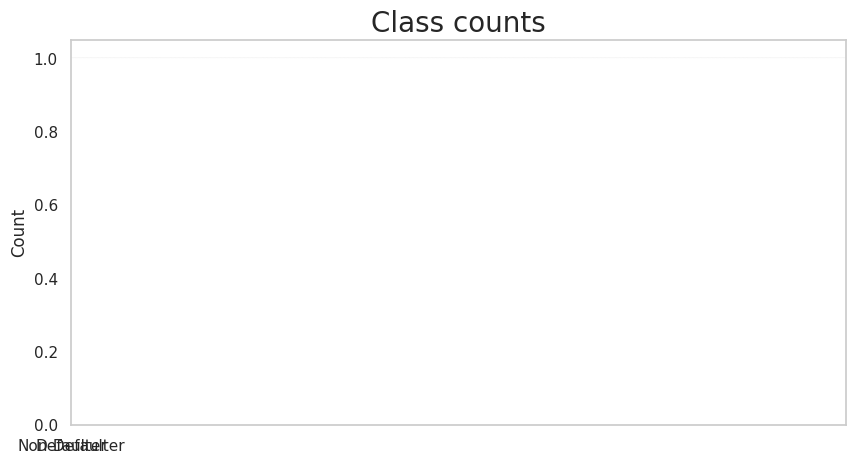

In [ ]:
# Getting the number of positive and negative examples.
plt.figure(figsize=(10,5))
sns.countplot(Loan_renamed['Target variable'])
plt.xticks((0, 1), ["Non-Defaulter", "Defaulter"])
plt.xlabel("")
plt.ylabel("Count")
plt.title("Class counts", y=1, fontdict={"fontsize": 20})

print(Loan_renamed['Target variable'].value_counts())

## Insights
1. The classes are quite imbalanced. The defaulter class has very small sample.
2. Balancing the classes will be necessary

<Axes: title={'center': 'Loan Amount (Box Plot)'}, xlabel='Employment type', ylabel='Loan Amount'>

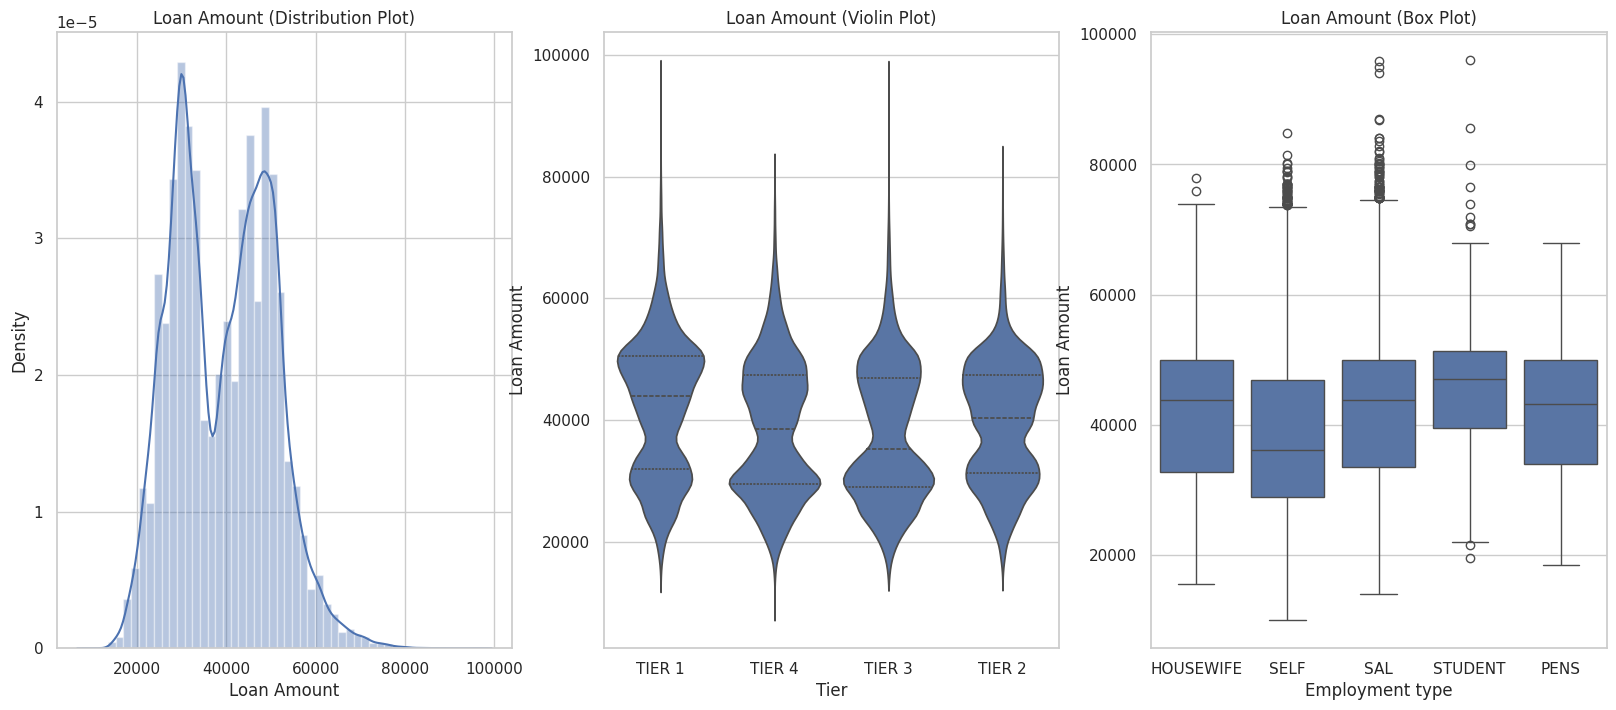

In [ ]:
sns.set(style="whitegrid")

fig, ax=plt.subplots(nrows =1,ncols=3,figsize=(20,8))
ax[0].set_title("Loan Amount (Distribution Plot)")
sns.distplot(Loan_renamed['Loan Amount'],ax=ax[0])
ax[1].set_title("Loan Amount (Violin Plot)")
sns.violinplot(data =Loan_renamed, x='Tier',y='Loan Amount',ax=ax[1], inner="quartile")
ax[2].set_title("Loan Amount (Box Plot)")
sns.boxplot(data =Loan_renamed, x='Employment type',y='Loan Amount',ax=ax[2],orient='v')

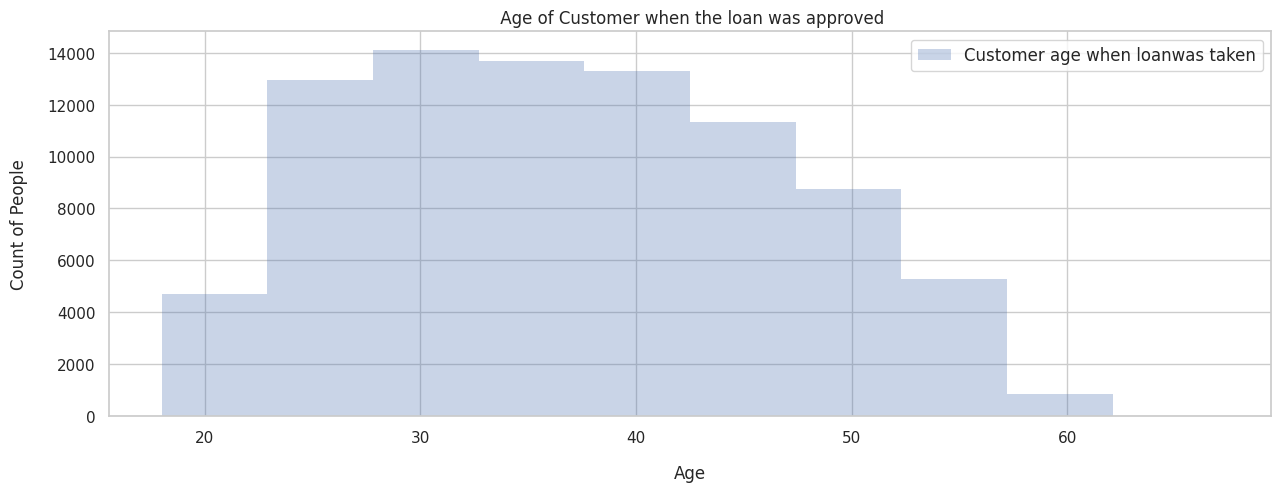

In [ ]:
##Age- age at which the client took the loan
plt.figure(figsize=(15,5))

#bar plot
Loan_renamed['Customer age when loanwas taken'].plot(kind='hist',color='b',alpha=0.3, edgecolor='none')
plt.xlabel("Age", labelpad=14)
plt.ylabel("Count of People", labelpad=14)
plt.title(" Age of Customer when the loan was approved")
plt.legend(loc="best",prop={"size":12})

<Axes: xlabel='Customer age when loanwas taken', ylabel='Loan Amount'>

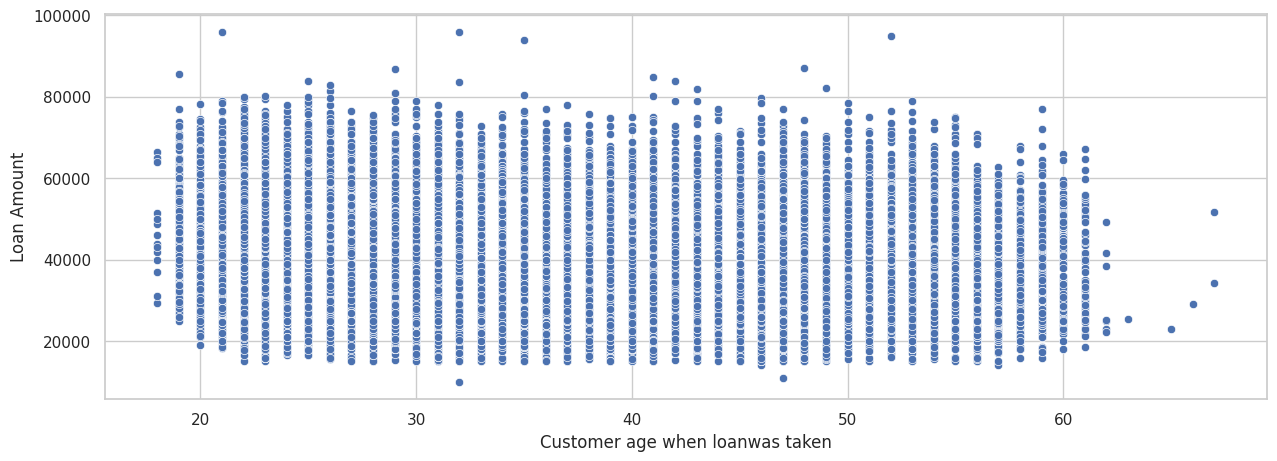

In [ ]:
# Explore correlation between age and loan amount
plt.figure(figsize=(15,5))
sns.scatterplot(x=Loan_renamed['Customer age when loanwas taken'],y='Loan Amount',data=Loan_renamed)

In [ ]:
gender = pd.get_dummies(Loan_renamed['Gender'])
Loan_renamed=pd.concat([Loan_renamed,gender], axis=1)
Loan_renamed = Loan_renamed.drop('Gender', axis=1)

In [ ]:
dropped = ['Max amount sanctioned in the Live loans','Total sanctioned amount in the secured Loans which are Live',
'Total sanctioned amount in the unsecured Loans which are Live','Maximum amount sanctioned for any Two wheeler loan']

Loan_renamed.drop(dropped,axis=1,inplace=True)

Data Cleaning

In [ ]:
data=Loan_renamed.copy()

In [ ]:
CatVariables = data.select_dtypes(include=['object'])
NumVariables = data.select_dtypes(include=['float','int'])

#standardizing column names for easier usage
data.columns=data.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
CatVariables=CatVariables.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
NumVariables=NumVariables.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

In [ ]:
#For quantitative data

numerical_cols = data[NumVariables]
categorical_cols = data[CatVariables]

imp_mean = SimpleImputer(missing_values=np.nan, strategy='median')
lat = imp_mean.fit_transform(numerical_cols)
imp_mode = SimpleImputer(missing_values=np.nan,strategy='most_frequent')
g_se = imp_mode.fit_transform(categorical_cols)

In [ ]:
data[CatVariables]= g_se
data[NumVariables]= lat

Encoding

In [ ]:
# Dealing with categorical columns
# Label Encoding for object to numeric conversion
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for feature in CatVariables:
    data[feature] = le.fit_transform(data[feature].astype(str))

class imbalance

In [ ]:
X=data.drop(['customer_id','target_variable'],axis=1)
y=data[["target_variable"]]

array([[<Axes: title={'center': 'target_variable'}>]], dtype=object)

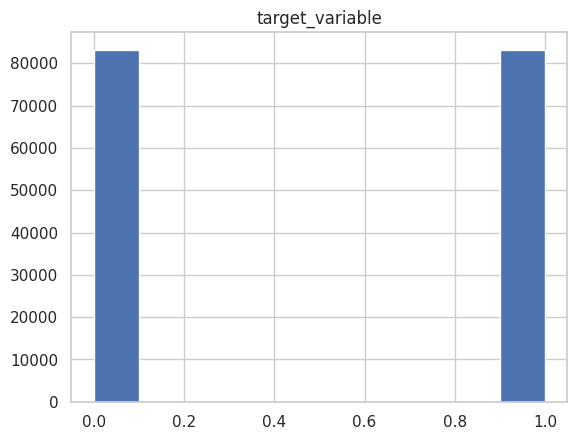

In [ ]:
smote_sample=SMOTE(random_state=124,sampling_strategy='auto') # the sampling strategy can be one of float, str, dict or callable `float``,
#it corresponds to the desired ratio of the number of samples in the minority class over the number of samples in the majority class after resampling ie {1:500}
# ``'minority'``: resample only  minority class; 'not minority'``:all but the minority class; ``'not majority'``: all but the majority, ``'all'`` ,``'auto'``:
x_res, y_res = smote_sample.fit_resample(X,y)


# now plot the classes
y_res.hist()

In [ ]:
print(x_res.shape,y_res.shape)

(166388, 25) (166388, 1)


## Checking for linear separability of the data

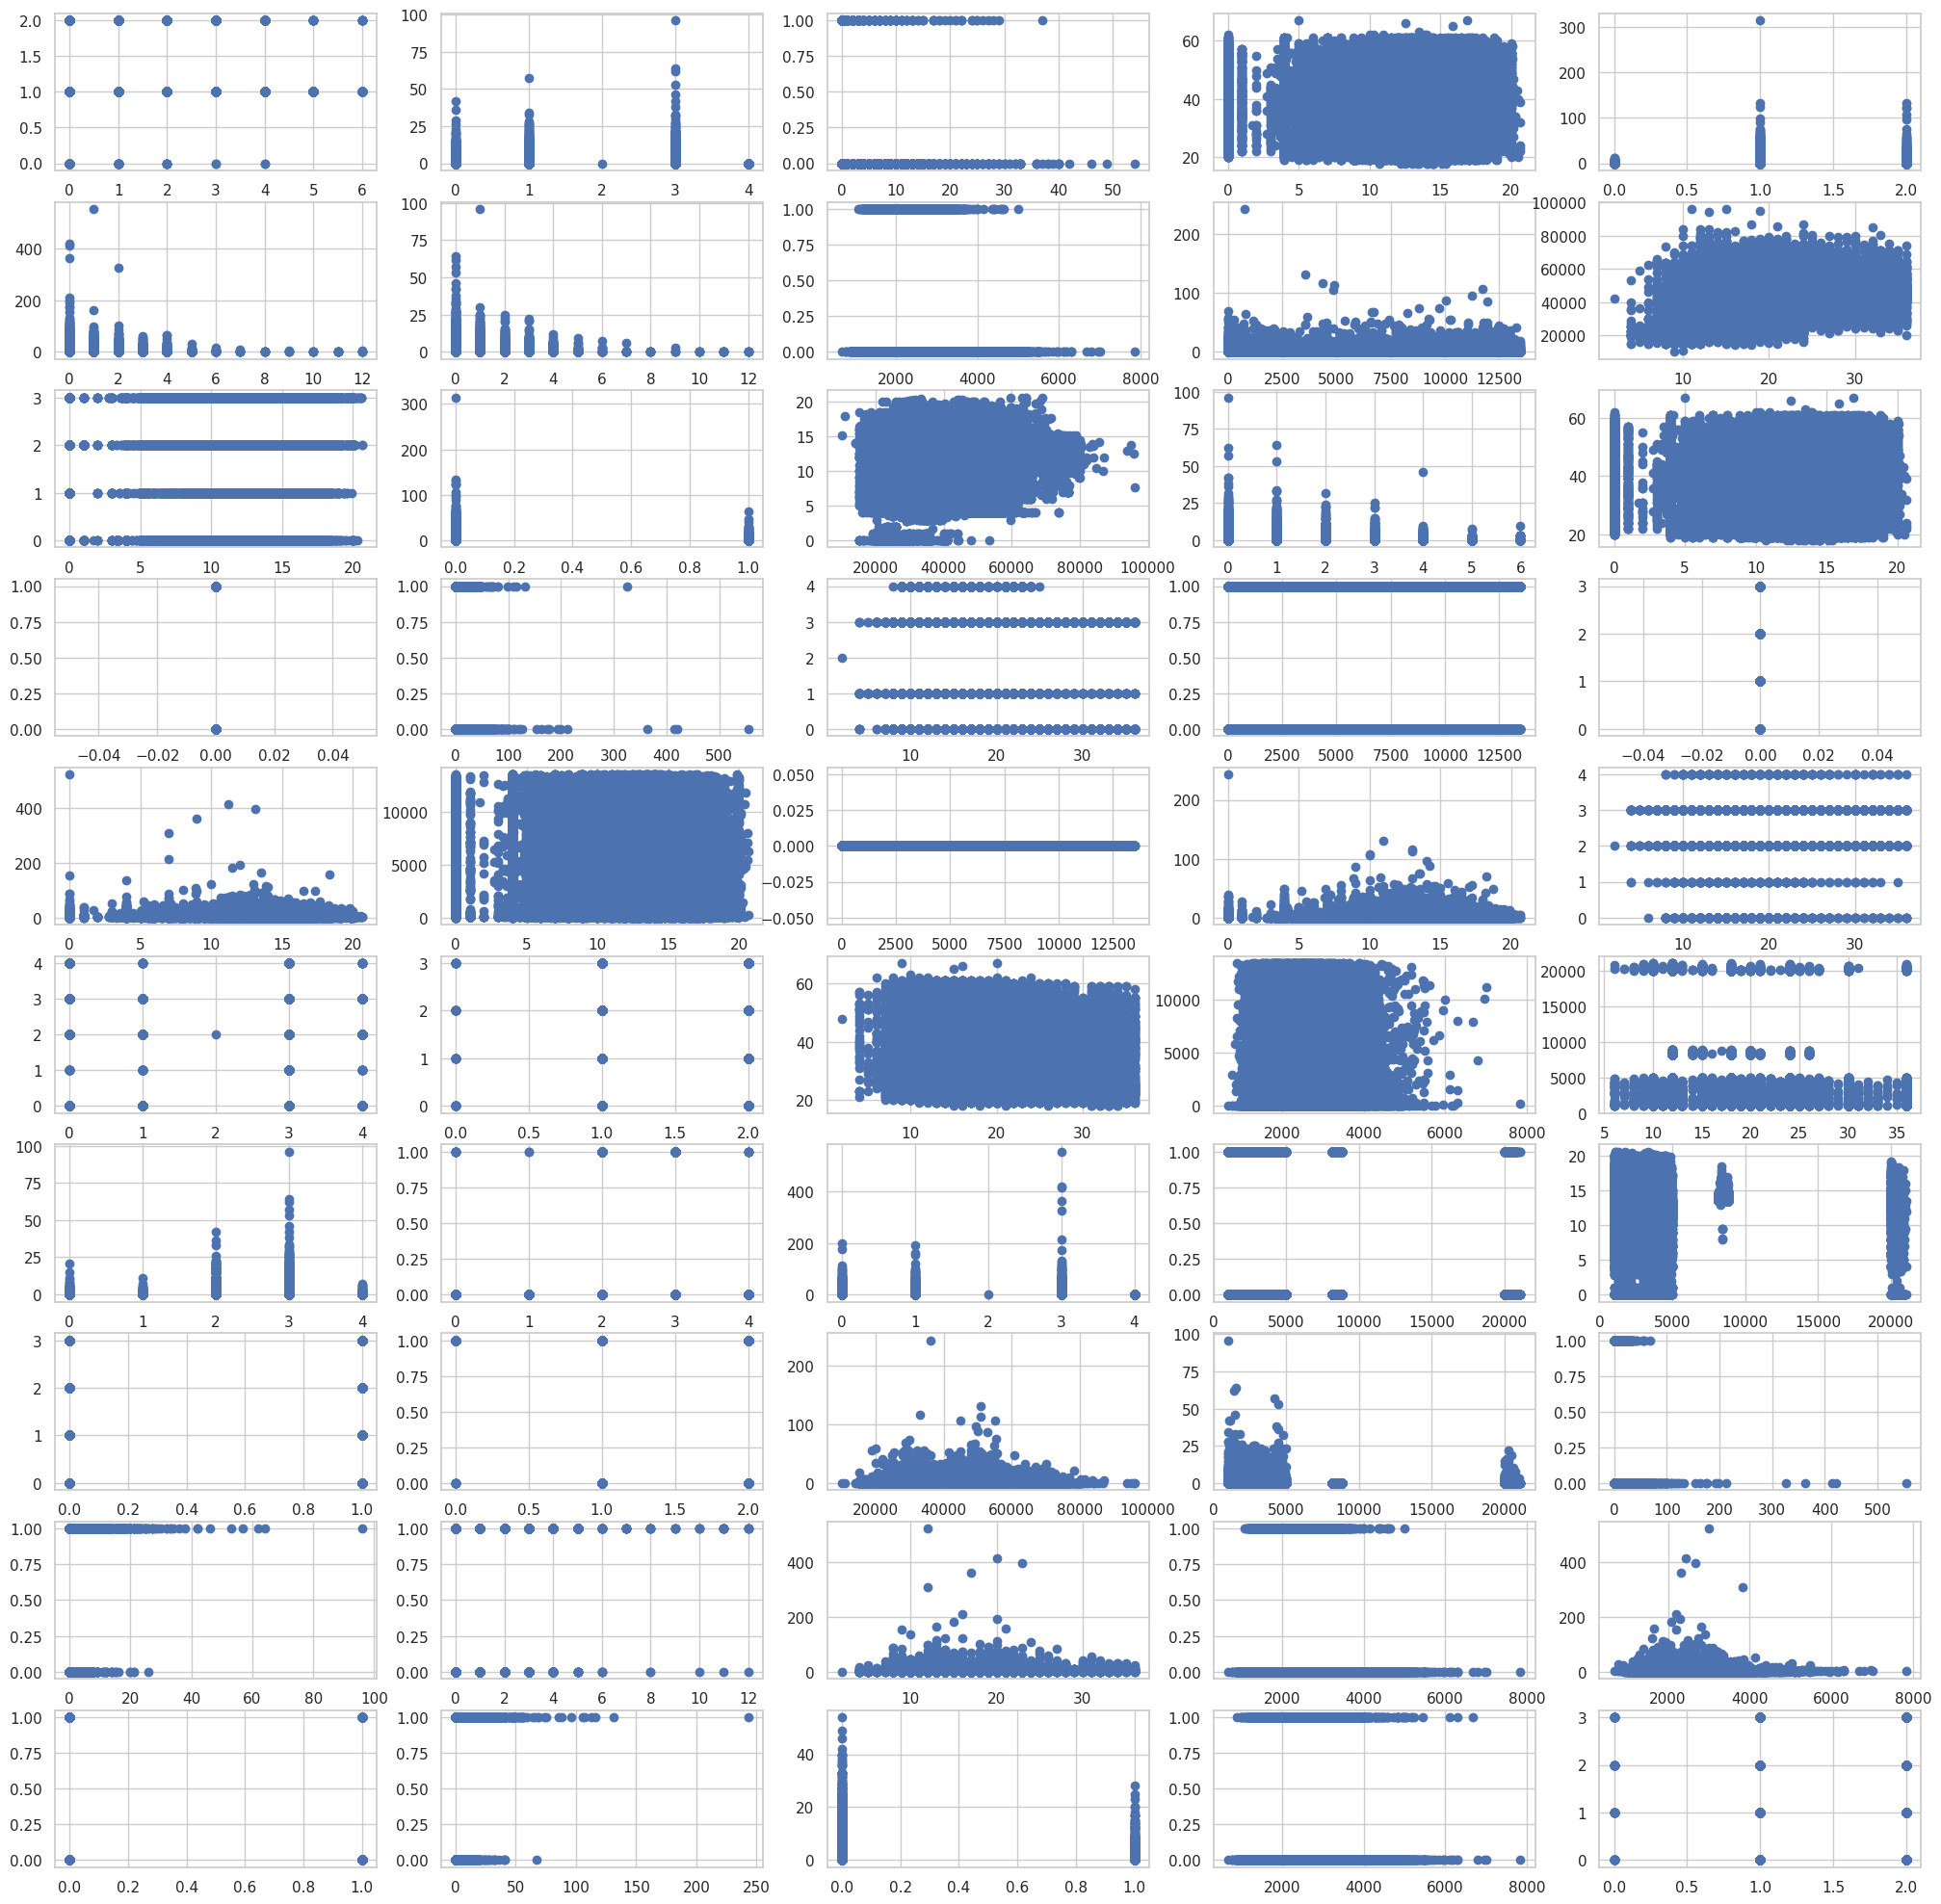

In [ ]:
#Bivariate Data Analysis (Scatter Plots)
comb = list(itertools.combinations([a for a in range(1, len(Loan_renamed.columns))], 2)) #Create combinations of all features, in twos (bivariate)
rand = random.choices(comb, k=50)

fig = plt.figure(figsize=(25,25))
for i in range(len(rand)):
    ax = fig.add_subplot(10,5, i+1)
    plt.scatter(data[data.columns[rand[i][0]]],data[data.columns[rand[i][1]]])

## Insights
1. Most data features are linearly separable for the classification problem.
2. Support Vector Machines with linear kernel model would probably be the models for this data

## Building and comparing different Models

In [ ]:
#Train Test Split: Reserve 30% of data for final model testing
X_train, X_test, y_train, y_test = train_test_split(x_res, y_res, test_size=0.30, random_state=20)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(116471, 25) (49917, 25) (116471, 1) (49917, 1)


In [ ]:
#Logistic Regression (No Regularisation)
pipe = make_pipeline(PolynomialFeatures(degree=1), LogisticRegression())
scores = cross_val_score(pipe, X_train, y_train, cv=3, scoring="accuracy")
print(scores, scores.mean())

[0.74405007 0.75551205 0.76774077] 0.7557676329141101


In [ ]:
#logistic regression with degree 2 polynomial features
pipe = make_pipeline(PolynomialFeatures(degree=2), LogisticRegression())
scores = cross_val_score(pipe, X_train, y_train, cv=3, scoring="accuracy")
print(scores, scores.mean())

[0.60076242 0.61261076 0.57816243] 0.5971785335739876


In [ ]:
# Support vector classification - linear Kernel
pipe = make_pipeline(PolynomialFeatures(degree=2), LinearSVC(C=50))
scores = cross_val_score(pipe, X_train, y_train, cv=3, scoring="accuracy")
print(scores, scores.mean())

[0.81640223 0.81480528 0.81078227] 0.8139965895860657


In [ ]:
pipe = make_pipeline(PolynomialFeatures(degree=1), LinearSVC(C=50))
scores = cross_val_score(pipe, X_train, y_train, cv=3, scoring="accuracy")
print(scores, scores.mean())

[0.81539769 0.81369771 0.81091106] 0.8133354875940816


In [ ]:
pipe = make_pipeline(PolynomialFeatures(degree=2), LinearSVC(C=70))
scores = cross_val_score(pipe, X_train, y_train, cv=3, scoring="accuracy")
print(scores, scores.mean())

[0.81748403 0.81341438 0.81181259] 0.8142369995585662


In [ ]:
#SVM with linear kernel
pipe = make_pipeline(PolynomialFeatures(degree=2), LinearSVC(C=100))
scores = cross_val_score(pipe, X_train, y_train, cv=3, scoring="accuracy")
print(scores, scores.mean())

[0.81709767 0.81681434 0.81802025] 0.8173107529727809


In [ ]:
pipe = make_pipeline(PolynomialFeatures(degree=2), LinearSVC(C=150))
scores = cross_val_score(pipe, X_train, y_train, cv=3, scoring="accuracy")
print(scores, scores.mean())

[0.81642798 0.81217803 0.8099065 ] 0.8128375052072491


In [ ]:
# classification - Random Forest
pipe = make_pipeline(PolynomialFeatures(degree=1),RandomForestClassifier())
scores = cross_val_score(pipe, X_train, y_train, cv=3, scoring="accuracy")
print(scores, scores.mean())

[0.98696682 0.98660622 0.98658012] 0.9867177225437876


## Insights
SVM with linear kernel performed well as expected because the data is linearly separable
The Random Forest model performs the excellently but it could be a case of overfitting the train data.

In [ ]:
#best model
#SVM with linear kernel
pipe = make_pipeline(PolynomialFeatures(degree=2), LinearSVC(C=100))
scores = cross_val_score(pipe, X_train, y_train, cv=3, scoring="accuracy")
print(scores, scores.mean())


## Testing the Model

In [ ]:
model = LinearSVC()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('Accuracy:',accuracy_score(y_test,y_pred))

Accuracy: 0.8169160806939519
